#   A Tiny Data Science Project


***

 Student Name:      Shalini Tyagi
 
 Project Title:     Machine Learning Approach for Predicting the Type and Price of Avocado: A data analysis case study

***




### Two Sections of Notebook
I divide the notebook in to  two section  because I wanted to see that how avocado is growing in US market. so  section first is exploratory analysis, predicting avocado types and  forecasting the price with different models. The second section of the notebook is about analysis of avocado on the population and also to see the trend of sale of avocado in caomparison of the other fruits.
For that I took some other dataset to find out the relation between them.Here is the link of the chosen datasets 
http://www.hassavocadoboard.com/retail/fruit-trending-data (all fruits trending data)
https://www.census.gov/data/tables/2017/demo/popest/nation-total.html (population data of US)

### IMPORTING SOME IMPORTANT PACKAGES 

In [1]:
# Import the packages
import os
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import datasets
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from sklearn import metrics

C:\Users\Shali\Documents\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### SECTION 1

In [2]:
# Set the working directory
os.getcwd()
os.chdir('C:\\Users\\Shali\\Documents\\MSC_DS_SHALU\\Principle_of_data_Science_Module\\PDS_Coursework')

In [3]:
# Load the dataset
data = pd.read_csv('avocado.csv',index_col=0)
# Convert in to the dataframe
data = pd.DataFrame(data)
print(data)


          Date  AveragePrice  Total Volume     4046       4225     4770  \
0   27/12/2015          1.33      64236.62  1036.74   54454.85    48.16   
1   20/12/2015          1.35      54876.98   674.28   44638.81    58.33   
2   13/12/2015          0.93     118220.22   794.70  109149.67   130.50   
3   06/12/2015          1.08      78992.15  1132.00   71976.41    72.58   
4   29/11/2015          1.28      51039.60   941.48   43838.39    75.78   
5   22/11/2015          1.26      55979.78  1184.27   48067.99    43.61   
6   15/11/2015          0.99      83453.76  1368.92   73672.72    93.26   
7   08/11/2015          0.98     109428.33   703.75  101815.36    80.00   
8   01/11/2015          1.02      99811.42  1022.15   87315.57    85.34   
9   25/10/2015          1.07      74338.76   842.40   64757.44   113.00   
10  18/10/2015          1.12      84843.44   924.86   75595.85   117.07   
11  11/10/2015          1.28      64489.17  1582.03   52677.92   105.32   
12  04/10/2015          1

In [4]:
data.shape

(18249, 13)

In [5]:
# take the sample data out of the original one
avocadodf = data.sample(frac=0.4)
avocadodf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14,20/09/2015,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,78779.54,11089.00,0.00,conventional,2015,WestTexNewMexico
4,22/11/2015,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.00,organic,2015,WestTexNewMexico
41,13/03/2016,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,88060.04,61699.90,0.00,conventional,2016,WestTexNewMexico
29,05/06/2016,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,15423.24,12558.70,2999.73,conventional,2016,Louisville
27,25/06/2017,2.50,3367.89,417.32,1868.61,0.00,1081.96,71.66,1010.30,0.00,organic,2017,Spokane


In [6]:
# reset the indexing of the data
avocadodf = avocadodf.reset_index(drop=True)
avocadodf.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20/09/2015,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,78779.54,11089.00,0.00,conventional,2015,WestTexNewMexico
1,22/11/2015,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.00,organic,2015,WestTexNewMexico
2,13/03/2016,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,88060.04,61699.90,0.00,conventional,2016,WestTexNewMexico
3,05/06/2016,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,15423.24,12558.70,2999.73,conventional,2016,Louisville
4,25/06/2017,2.50,3367.89,417.32,1868.61,0.00,1081.96,71.66,1010.30,0.00,organic,2017,Spokane


In [7]:
# shape of the sampled data
avocadodf.shape

(7300, 13)

In [8]:
# check the duplicate values
avocadodf.duplicated().sum()

0

In [9]:
# to get the general idea about the data
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 13 columns):
Date            7300 non-null object
AveragePrice    7300 non-null float64
Total Volume    7300 non-null float64
4046            7300 non-null float64
4225            7300 non-null float64
4770            7300 non-null float64
Total Bags      7300 non-null float64
Small Bags      7300 non-null float64
Large Bags      7300 non-null float64
XLarge Bags     7300 non-null float64
type            7300 non-null object
year            7300 non-null int64
region          7300 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 741.5+ KB


no null values in the data

In [10]:
# convert date into datetime and create new columns
avocadodf['Date']=pd.to_datetime(avocadodf['Date'])

avocadodf['Month']=avocadodf['Date'].apply(lambda x:x.month)
avocadodf['Day'] = avocadodf['Date'].apply(lambda x:x.day)

In [11]:
avocadodf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-09-20,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,78779.54,11089.00,0.00,conventional,2015,WestTexNewMexico,9,20
1,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.00,organic,2015,WestTexNewMexico,11,22
2,2016-03-13,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,88060.04,61699.90,0.00,conventional,2016,WestTexNewMexico,3,13
3,2016-05-06,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,15423.24,12558.70,2999.73,conventional,2016,Louisville,5,6
4,2017-06-25,2.50,3367.89,417.32,1868.61,0.00,1081.96,71.66,1010.30,0.00,organic,2017,Spokane,6,25


In [12]:
# give the name of the columns basesd on their product lookup code
avocadodf.rename(columns = {'4046': 'small Hass', '4225':'large Hass', '4770':'extra large Hass'}, inplace = True)
avocadodf.columns


Index(['Date', 'AveragePrice', 'Total Volume', 'small Hass', 'large Hass',
       'extra large Hass', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region', 'Month', 'Day'],
      dtype='object')

### DATA EXPLORATION

C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'number of frequency')

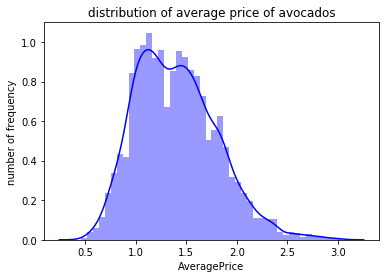

In [13]:
# To visualise the distribution of the average price
sns.distplot(avocadodf['AveragePrice'], hist=True, color = 'b')
plt.title ('distribution of average price of avocados')
plt.xlabel('AveragePrice')
plt.ylabel('number of frequency')

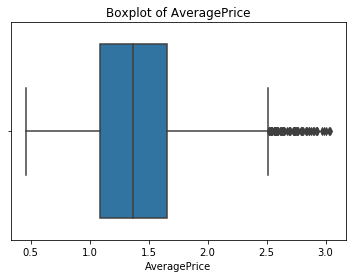

In [14]:
# show the outliers 
plt.title('Boxplot of AveragePrice')
sns.boxplot(avocadodf['AveragePrice'])

Text(0.5,1,'relation between Average Price and small Hass')

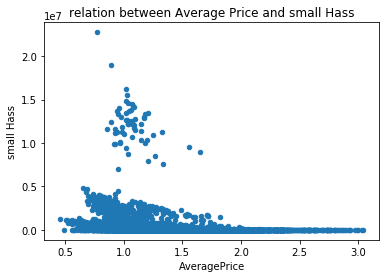

In [15]:
# visualise the scatter graph between AveragePrice and small Hass
avocadodf.plot.scatter('AveragePrice','small Hass')
plt.title('relation between Average Price and small Hass')

organic         3679
conventional    3621
Name: type, dtype: int64


([<matplotlib.patches.Wedge at 0x1f8da2e89e8>,
 [Text(-1.09991,-0.0137279,'conventional'), Text(1.09991,0.0137279,'organic')],
 [Text(-0.599953,-0.00748796,'50.4%'), Text(0.599953,0.00748796,'49.6%')])

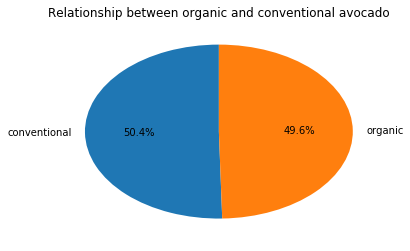

In [16]:
# show the percentage of avocado types
avocadodf_type = pd.value_counts(avocadodf['type'])
print(avocadodf_type)
labels = ['conventional', 'organic']
colors = ['red', 'blue']
plt.title('Relationship between organic and conventional avocado')
plt.pie(avocadodf_type,labels= labels, startangle=90, autopct='%1.1f%%')


Text(0.5,1,'Relationship between different types of avocados')

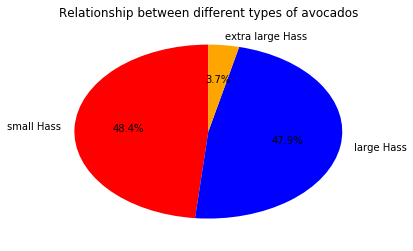

In [17]:
# distribution of differnt sizes of avocados sold  
x= np.sum(avocadodf['small Hass'])
y= np.sum(avocadodf['large Hass'])
z= np.sum(avocadodf['extra large Hass'])
sizes= np.array([x,y,z])
labels = ['small Hass', 'large Hass', 'extra large Hass']
colors = ['red', 'blue', 'orange']
plt.pie(sizes,labels= labels, colors = colors, startangle=90, autopct='%1.1f%%')
plt.title('Relationship between different types of avocados')

Text(0,0.5,'Average Price')

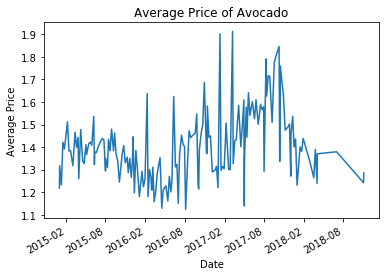

In [18]:
# To create a chart between Date and AveragePrice to analyse the varaition of price
Date= avocadodf.groupby('Date').mean()
Date['AveragePrice'].plot()
plt.title('Average Price of Avocado')
plt.xlabel('Date')
plt.ylabel('Average Price')

C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


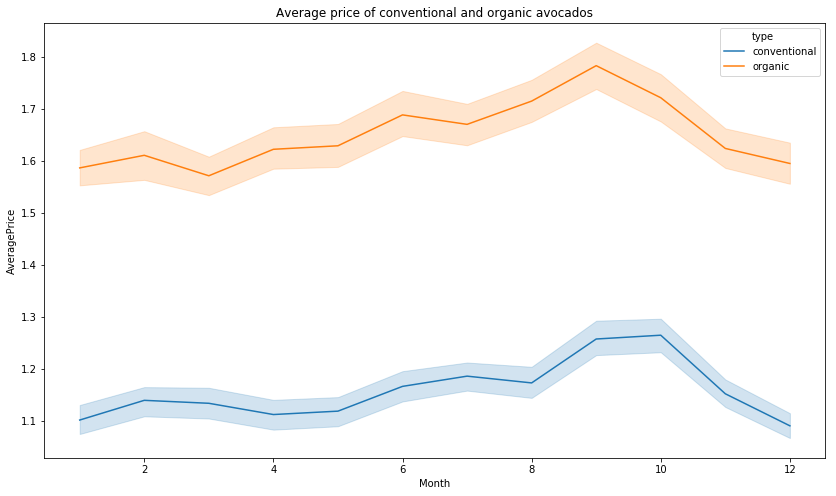

In [19]:
# visualize average price of conventional and organic
plt.figure(figsize=(14,8))
plt.title('Average price of conventional and organic avocados')
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=avocadodf)
plt.show()

Text(0.5,1,'Average Price of Avocado regionwise')

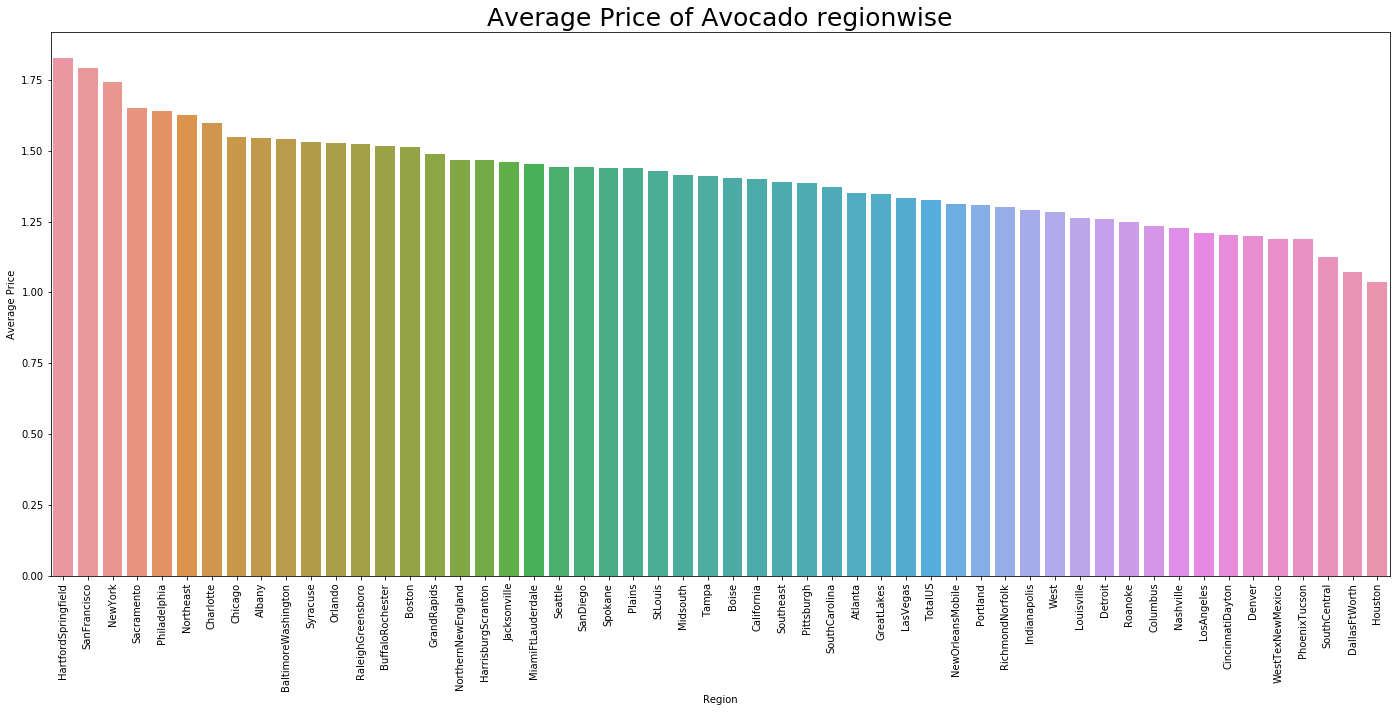

In [20]:
region_list=list(avocadodf.region.unique())
average_price=[]

for i in region_list:
    x=avocadodf[avocadodf.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df.average_price.sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)
rc={'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 25.0, 'axes.titlesize': 25}
plt.rcParams.update(**rc)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado regionwise')

Text(0.5,1,'Average of Total Volume According to Region')

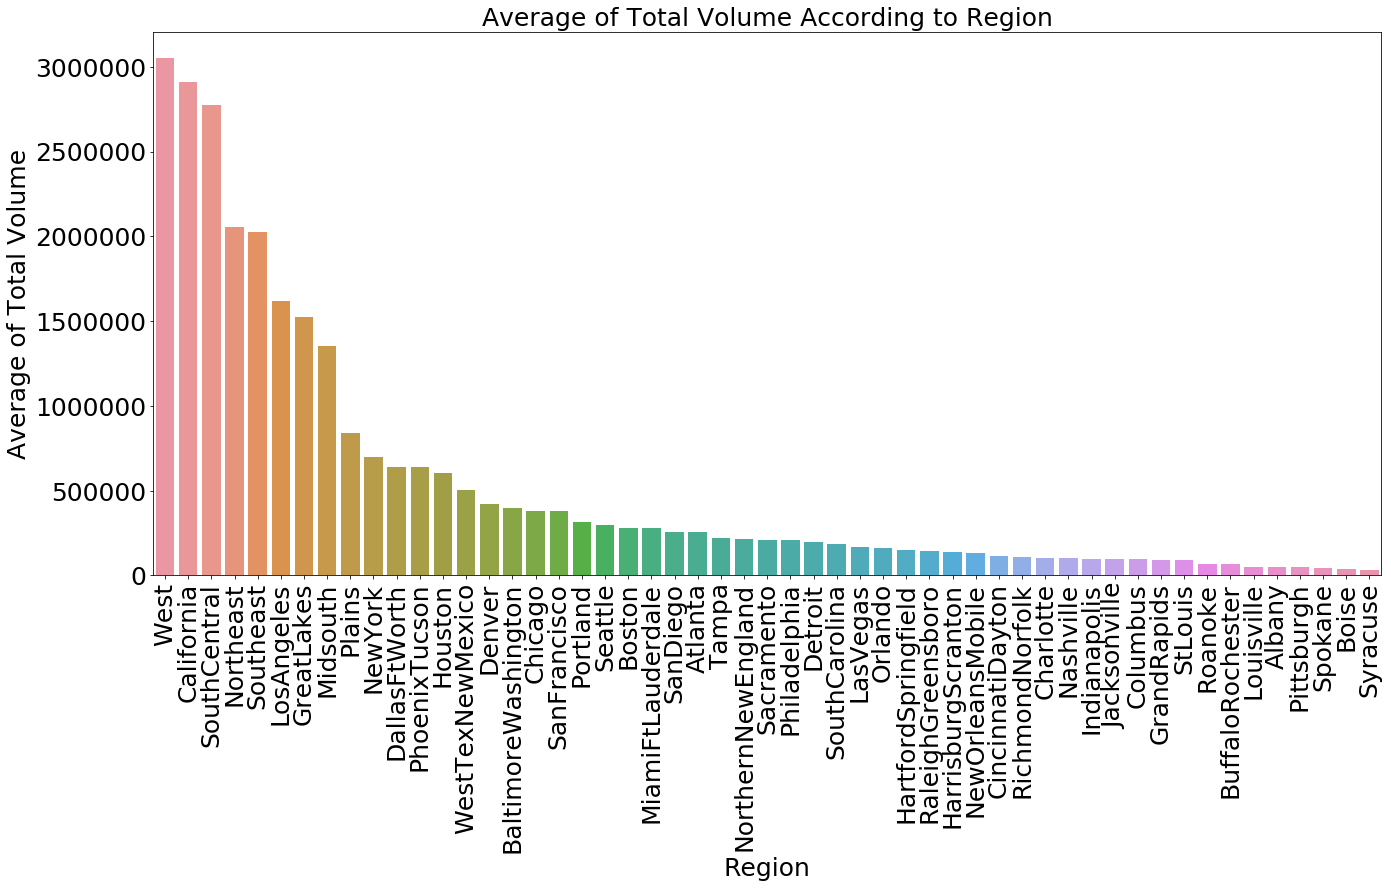

In [21]:
region_list = avocadodf.region != 'TotalUS'
df = avocadodf[region_list]
region_list_new = (df.region.unique())
average_total_volume = []
for i in region_list_new:
    x = df[df.region == i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))    
df1=pd.DataFrame({'region_list_new':region_list_new,'average_total_volume':average_total_volume})
new_index = df1.average_total_volume.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data.region_list_new,y=sorted_data.average_total_volume)
rc={'axes.labelsize': 25, 'font.size': 15, 'legend.fontsize': 25.0, 'axes.titlesize': 25}
plt.rcParams.update(**rc)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')




C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


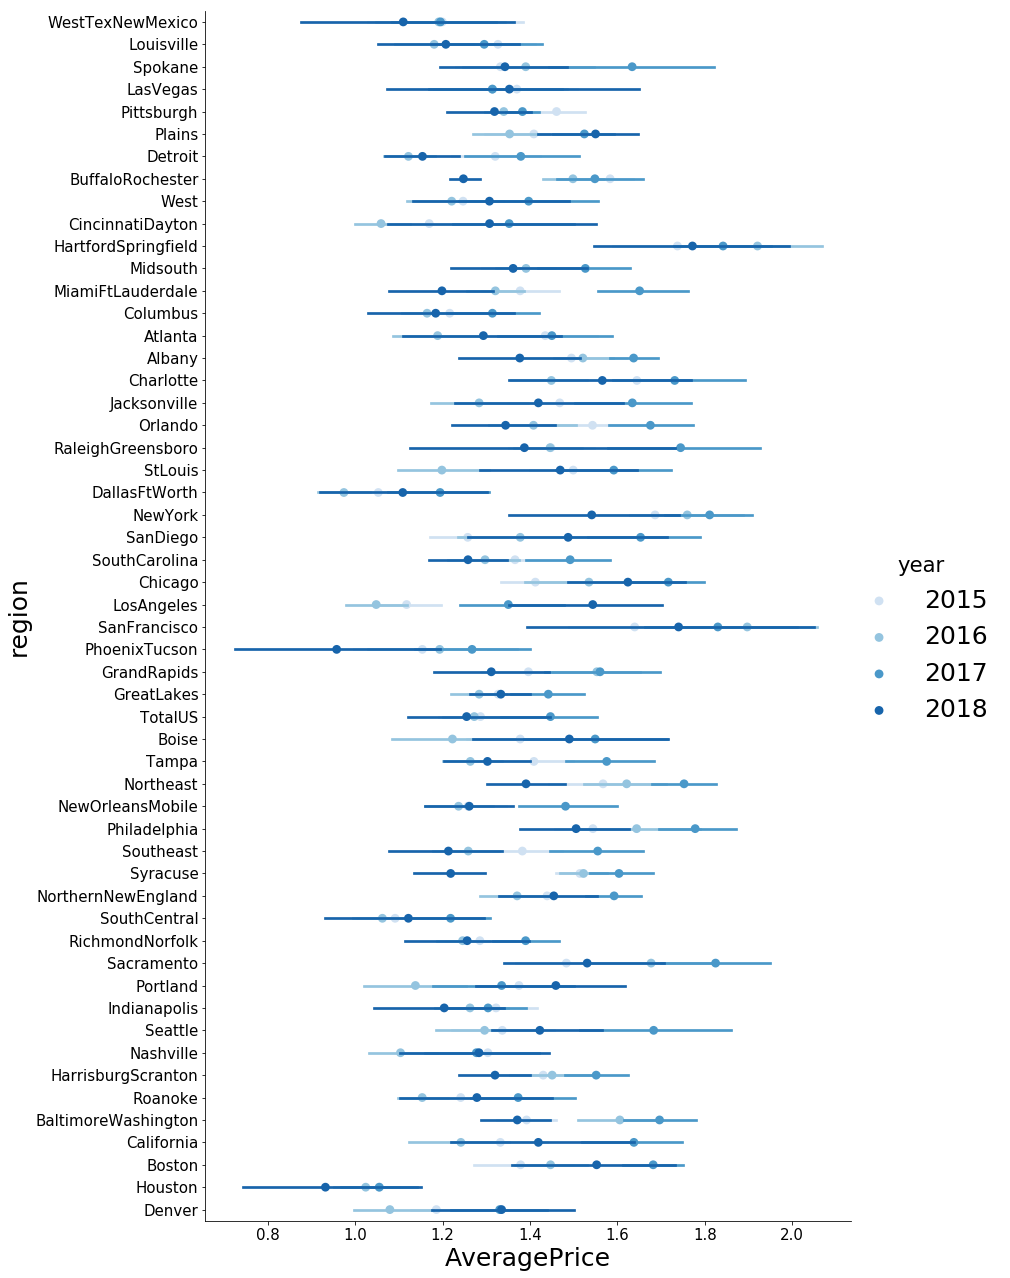

In [22]:
g = sns.factorplot('AveragePrice','region',data=avocadodf, hue='year',height=18,aspect=0.7,palette='Blues',join=False,)

In [23]:
mask = avocadodf['type']=='conventional'
mask1 = avocadodf['type']=='organic'

In [24]:
order = (
    avocadodf[mask & (avocadodf['year']==2018)]
    .groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


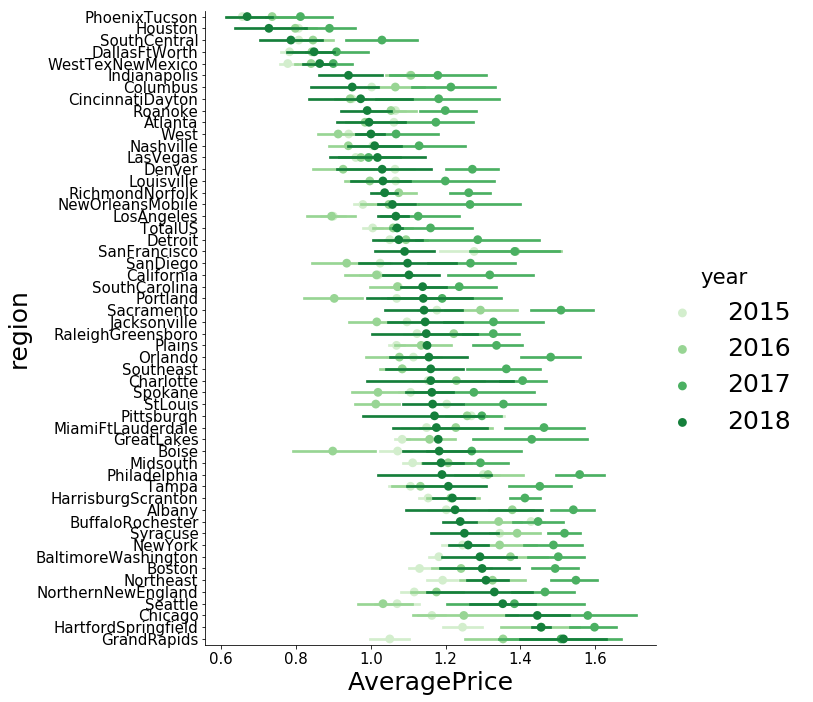

In [25]:
g = sns.factorplot('AveragePrice','region',data=avocadodf[mask],
                   hue='year',
                   size=10,
                   aspect=1,
                   palette='Greens',
                   order=order,
                   join=False,
              )

In [26]:
order1 = (
    avocadodf[mask1 & (avocadodf['year']==2018)]
    .groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


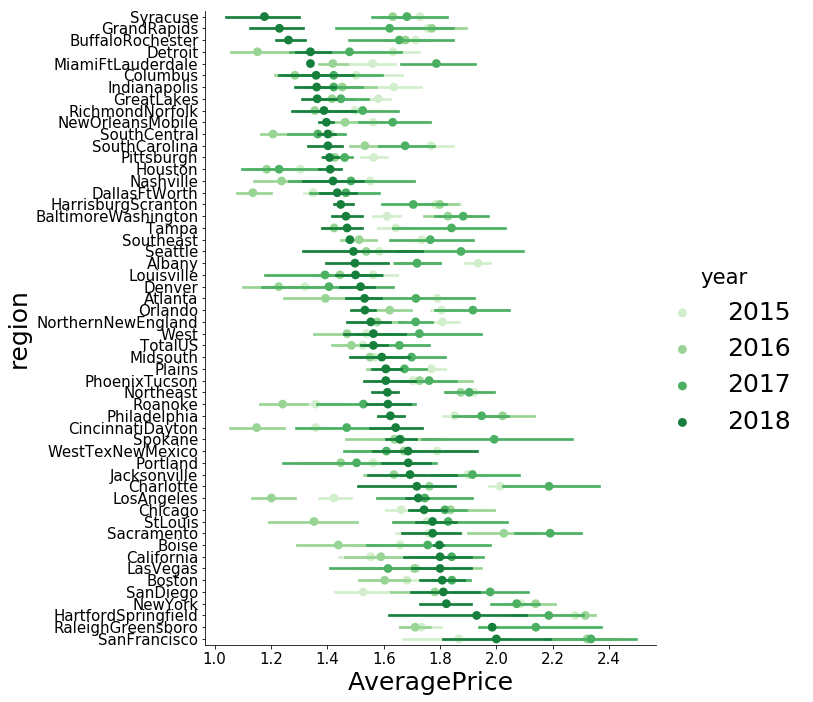

In [27]:
g = sns.factorplot('AveragePrice','region',data=avocadodf[mask1],
                   hue='year',
                   size=10,
                   aspect=1,
                   palette='Greens',
                   order=order1,
                   join=False,
              )

### Data  Transformation

In [28]:
# count the number of region
avocadodf['region'].nunique()

54

In [29]:
avocadodf['type'].nunique()

2

In [30]:
avocadodf.head()

,Date,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-09-20,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,78779.54,11089.00,0.00,conventional,2015,WestTexNewMexico,9,20
1,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.00,organic,2015,WestTexNewMexico,11,22
2,2016-03-13,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,88060.04,61699.90,0.00,conventional,2016,WestTexNewMexico,3,13
3,2016-05-06,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,15423.24,12558.70,2999.73,conventional,2016,Louisville,5,6
4,2017-06-25,2.50,3367.89,417.32,1868.61,0.00,1081.96,71.66,1010.30,0.00,organic,2017,Spokane,6,25


In [31]:
# check the types of attributes in the data
print(avocadodf.dtypes)

Date                datetime64[ns]
AveragePrice               float64
Total Volume               float64
small Hass                 float64
large Hass                 float64
extra large Hass           float64
Total Bags                 float64
Small Bags                 float64
Large Bags                 float64
XLarge Bags                float64
type                        object
year                         int64
region                      object
Month                        int64
Day                          int64
dtype: object


In [32]:
# convert the region in to categorical data
avocadodf['region'] = avocadodf['region'].astype('category')
print(avocadodf.dtypes)

Date                datetime64[ns]
AveragePrice               float64
Total Volume               float64
small Hass                 float64
large Hass                 float64
extra large Hass           float64
Total Bags                 float64
Small Bags                 float64
Large Bags                 float64
XLarge Bags                float64
type                        object
year                         int64
region                    category
Month                        int64
Day                          int64
dtype: object


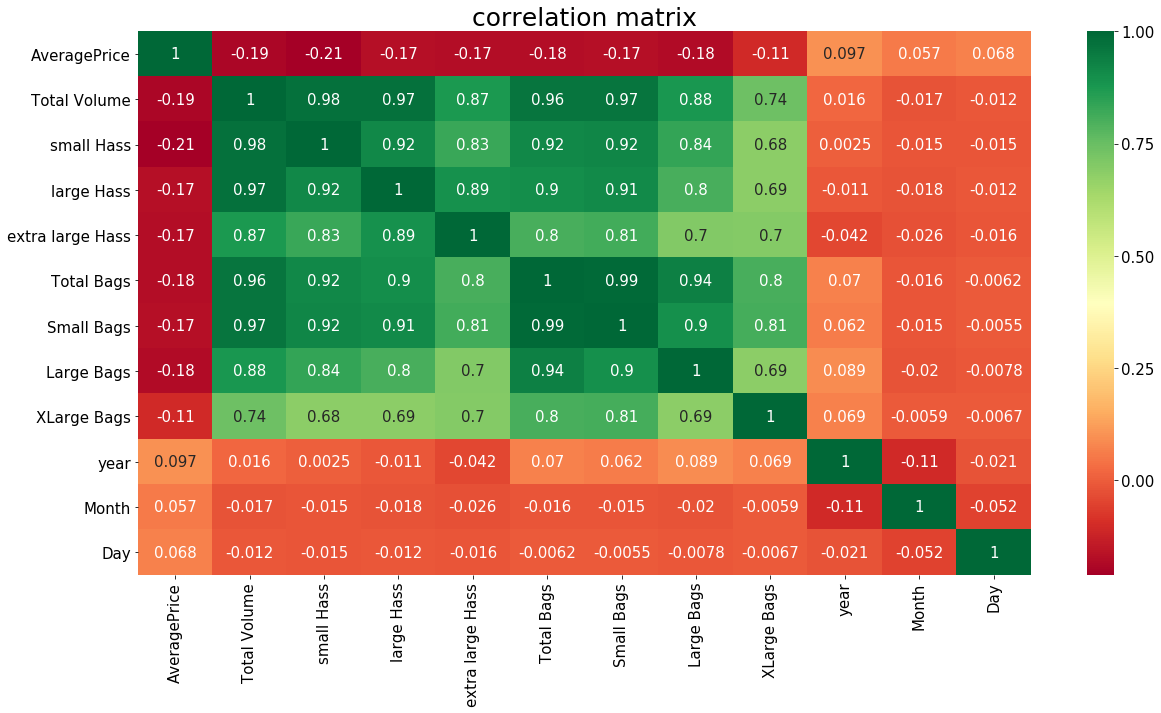

In [33]:
# plot the correlation matrix
plt.figure(figsize=(20,10))
plt.title('correlation matrix')
sns.heatmap(avocadodf.corr(), cmap = 'RdYlGn', annot = True )

 ###   PREDICT THE TYPE OF AVOCADO: ORGANIC OR CONVENTIONAL

Region column has 54 different regions it is hard to pass this category while training the model, so to overcome with that problem, Feature Hasher has been imported from feature_extraction library to encode each region in a unique code. 


In [34]:
feature_hash = FeatureHasher(n_features=5,input_type='string')
features_hashed = feature_hash.fit_transform(avocadodf['region']).toarray()
features_hashed = pd.DataFrame(features_hashed)
data1 = pd.concat([avocadodf,features_hashed],axis=1)
data1.head()

,Date,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,0,1,2,3,4
0,2015-09-20,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,78779.54,11089.00,0.00,conventional,2015,WestTexNewMexico,9,20,1.0,-3.0,-2.0,3.0,1.0
1,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.00,organic,2015,WestTexNewMexico,11,22,1.0,-3.0,-2.0,3.0,1.0
2,2016-03-13,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,88060.04,61699.90,0.00,conventional,2016,WestTexNewMexico,3,13,1.0,-3.0,-2.0,3.0,1.0
3,2016-05-06,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,15423.24,12558.70,2999.73,conventional,2016,Louisville,5,6,0.0,-3.0,3.0,0.0,0.0
4,2017-06-25,2.50,3367.89,417.32,1868.61,0.00,1081.96,71.66,1010.30,0.00,organic,2017,Spokane,6,25,1.0,-2.0,0.0,0.0,0.0


In [35]:
# Leaving the region column as it has been created hashed features out of them  no use in training model
data2 = avocadodf.drop(columns = ['Date','region'], axis=1)
data2["type"] = data2["type"].replace("conventional",0).replace("organic",1)
#data
data2.head()

,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,78779.54,11089.00,0.00,0,2015,9,20
1,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.00,1,2015,11,22
2,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,88060.04,61699.90,0.00,0,2016,3,13
3,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,15423.24,12558.70,2999.73,0,2016,5,6
4,2.50,3367.89,417.32,1868.61,0.00,1081.96,71.66,1010.30,0.00,1,2017,6,25


### PREDICTION OF TYPES OF AVOCADO USING RANDOM FOREST CLASSIFIER

In [36]:
# split the avocado dataset into training and test data
labels = data2['type']
# Remove the labels from the features
features= data2.drop('type', axis = 1)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)
print( train_features.shape, train_labels.shape)
print (test_features.shape, test_labels.shape)
test_features.head()

(5110, 12) (5110,)
(2190, 12) (2190,)


,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
733,1.26,371149.30,116452.65,117544.17,214.87,136937.61,36245.73,100691.88,0.00,2016,10,16
4863,1.62,391714.30,143615.47,197927.08,874.02,49297.73,46808.23,210.89,2278.61,2017,4,30
4614,0.94,253169.88,4551.23,80014.82,0.00,168603.83,31222.06,137381.77,0.00,2017,2,26
3786,1.31,123388.77,53963.92,22128.29,1875.36,45421.20,43150.55,2270.65,0.00,2016,10,16
1669,2.11,1181.37,37.91,873.33,0.00,270.13,223.33,46.80,0.00,2016,12,18


In [37]:
rfc = RandomForestClassifier(n_estimators=2000,random_state=42)
rfc.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
# Use the random forest method on the test data for prediction
predictions = rfc.predict(test_features)

In [39]:
# see the Model Accuracy
print("Accuracy:",metrics.accuracy_score(test_labels, predictions ))

Accuracy: 0.9885844748858448


this trained model is giving 99% accuracy

In [40]:
print(classification_report(test_labels,predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1054
          1       1.00      0.98      0.99      1136

avg / total       0.99      0.99      0.99      2190



In [41]:
# create the confusion matrix
print(confusion_matrix(test_labels,predictions))

[[1050    4]
 [  21 1115]]


Our model is giving (false positive) + (false negatives) = 21. Total 21 inaccurate predictions which is good.

### USING ANOTHER MODEL TO PREDICT TYPE OF AVOCADO

In [42]:
# k-nearest neighbors algorithm
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_features,train_labels)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
predictions_KNN = knn.predict(test_features)

In [44]:
print("Accuracy:",metrics.accuracy_score(test_labels, predictions_KNN ))

Accuracy: 0.9602739726027397


#### Use  Cross-Validation of KNN

To see the result of the model KNN for improvement or worsen after using cross validation 

In [45]:
scores = cross_val_score(knn,train_features,train_labels, cv = RepeatedKFold(n_repeats = 4))
print(np.mean(scores))

0.9611056751467713


After using cross validation, there is no difference in the result for KNN model

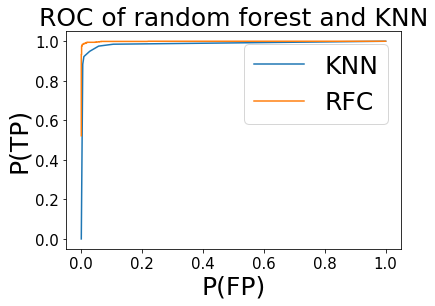

In [46]:
# Thresholds_knn
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_labels, knn.predict_proba(test_features)[:,1])
plt.plot(fpr_knn, tpr_knn, label = "KNN")
# ROC graph for random forest and KNN
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_labels, rfc.predict_proba(test_features)[:,1])
plt.plot(fpr_rfc, tpr_rfc, label = "RFC")
plt.xlabel("P(FP)")
plt.ylabel("P(TP)")
plt.title("ROC of random forest and KNN")
plt.legend(loc = "best")

Random forest and KNeighborsClassifier  has learned how to predict the type of avocado with 99% and 96% accuracy.

### PREDICT THE AVERAGE PRICE FOR AVOCADO 
#### BUILD THE LINEAR REGRESSION MODEL

In [47]:
# convert type into dummies by separating it into 2 other columns: organic and conventional
dummy_type = pd.get_dummies(avocadodf['type'])
# merge 
df= pd.concat([avocadodf, dummy_type], axis=1)
df1 = df.drop(columns=['type','region','Date','Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1)
df1.head()

,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,year,Month,Day,conventional,organic
0,0.78,746249.98,289135.19,352998.81,14247.44,89868.54,2015,9,20,1,0
1,1.97,6249.43,1733.40,2873.92,30.95,1611.16,2015,11,22,0,1
2,0.72,886197.95,563341.91,136619.69,36476.41,149759.94,2016,3,13,1,0
3,1.09,99179.74,2153.72,56150.97,9893.38,30981.67,2016,5,6,1,0
4,2.50,3367.89,417.32,1868.61,0.00,1081.96,2017,6,25,0,1


C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


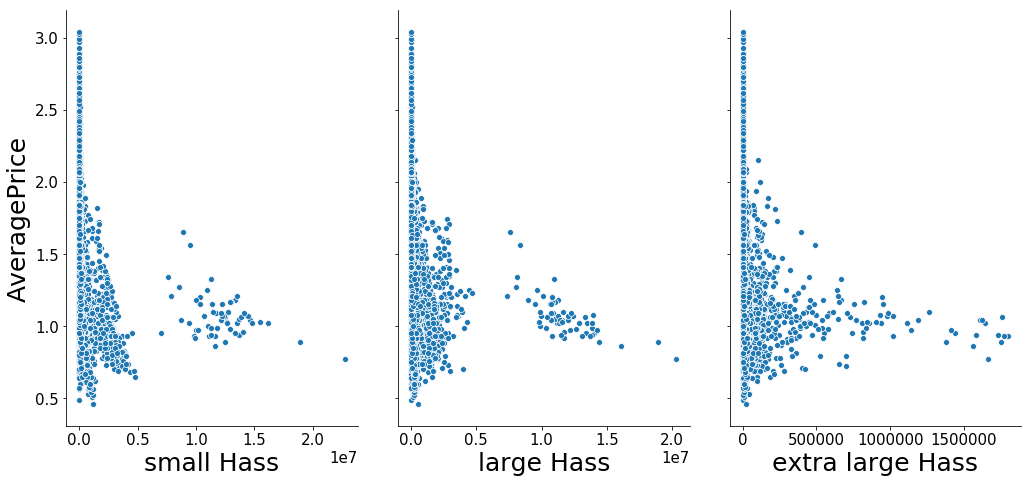

In [48]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df1, x_vars=['small Hass','large Hass','extra large Hass'], y_vars='AveragePrice', size=7, aspect=0.7)

In [49]:
# split the dataset into training and test data
labels = pd.DataFrame(df1['AveragePrice'])
# Remove the labels from the features
features=pd.DataFrame(df1.drop('AveragePrice', axis = 1))
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)
print( train_features.shape, train_labels.shape)
print (test_features.shape, test_labels.shape)

(5110, 10) (5110, 1)
(2190, 10) (2190, 1)


In [50]:
labels.head()

,AveragePrice
0,0.78
1,1.97
2,0.72
3,1.09
4,2.50


In [51]:
# TO get the list of columns
names = [i for i in list(features)]
names

['Total Volume',
 'small Hass',
 'large Hass',
 'extra large Hass',
 'Total Bags',
 'year',
 'Month',
 'Day',
 'conventional',
 'organic']

In [52]:
# fit the linear regression model
model1=sm.OLS(labels,features)
result = model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     556.5
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:02:06   Log-Likelihood:                -1800.7
No. Observations:                7300   AIC:                             3621.
Df Residuals:                    7290   BIC:                             3690.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Total Volume     -5.418e-05   6.76e-05  

C:\Users\Shali\Documents\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


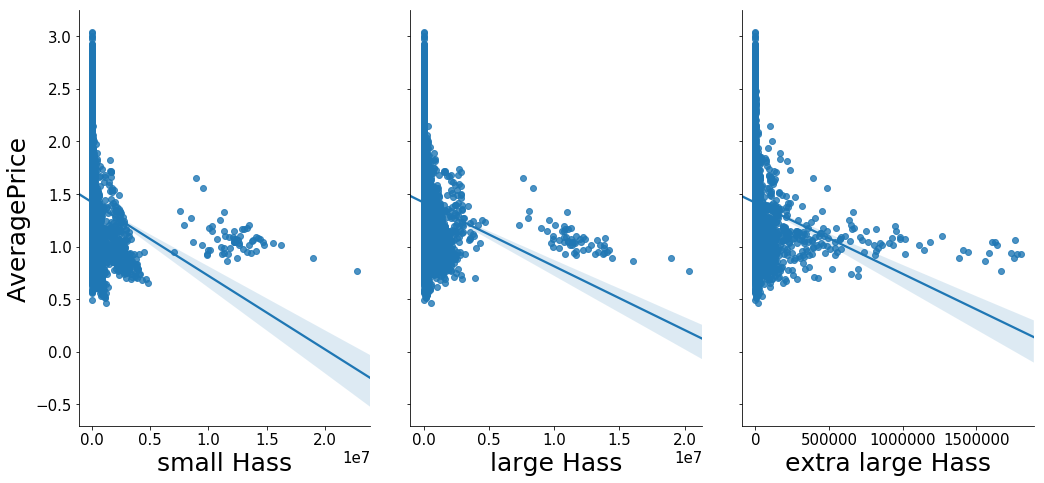

In [53]:
sns.pairplot(df1, x_vars=['small Hass','large Hass','extra large Hass'], y_vars='AveragePrice', size=7, aspect=0.7, kind='reg')

The performance of the model1 is not good. lets do some feature selection

In [54]:
from sklearn.feature_selection import mutual_info_regression
dependencies = mutual_info_regression(features, labels)
column_list = list(features.columns)
print('Mean among dependencies of X v.s. Y', np.mean(dependencies))
for i in range(len(dependencies)):
    if dependencies[i] > np.mean(dependencies):
        print('* ', column_list[i], dependencies[i])
    else:
        print(column_list[i], dependencies[i])

C:\Users\Shali\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean among dependencies of X v.s. Y 0.19256283706504881
*  Total Volume 0.3101274104031386
*  small Hass 0.3001605135556442
*  large Hass 0.2534271889449471
*  extra large Hass 0.20717766489530298
*  Total Bags 0.27850064912976613
year 0.03757483216010993
Month 0.007864920619067739
Day 0.0403839323516646
*  conventional 0.2503508289032119
*  organic 0.24006042968763497


In [55]:
features.columns

Index(['Total Volume', 'small Hass', 'large Hass', 'extra large Hass',
       'Total Bags', 'year', 'Month', 'Day', 'conventional', 'organic'],
      dtype='object')

In [56]:
selected_features = ['Total Volume', 'small Hass', 'large Hass', 'extra large Hass', 'Total Bags', 'conventional', 'organic']
X_train_sel = features[selected_features]

In [57]:
model_2 = sm.OLS(labels, X_train_sel)
res_2 = model_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     773.0
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:02:14   Log-Likelihood:                -1912.8
No. Observations:                7300   AIC:                             3840.
Df Residuals:                    7293   BIC:                             3888.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Total Volume     -1.753e-05   6.85e-05  

In [58]:
strong_relation_features = ['conventional', 'organic', 'year']
X_train_strong =features[strong_relation_features]

In [59]:
model_3 = sm.OLS(labels, X_train_strong)
res_3 = model_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     2261.
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:02:14   Log-Likelihood:                -1949.5
No. Observations:                7300   AIC:                             3905.
Df Residuals:                    7297   BIC:                             3926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
conventional   -81.1814      7.986    -10.166   

Not as good as the baseline

our linear regression model is not best fit for the prediction of avocado price for this dataset

### PREDICTING AND FORECASTING THE PRICE OF AVOCADO IN THE US WITH ARIMA MODEL

In [60]:
data3 = data.sample(frac=0.4)
data3['Date'] = pd.to_datetime(data3['Date'])
data3.set_index('Date', inplace=True)
data3.rename(columns = {'4046': 'small Hass', '4225':'large Hass', '4770':'extra large Hass'}, inplace = True)

data3.head()

,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-25,2.02,14337.32,1363.40,10912.03,46.42,2015.47,2015.47,0.00,0.00,organic,2015,NewYork
2017-03-26,1.02,8348.50,347.42,1704.92,0.00,6296.16,23.33,6272.83,0.00,organic,2017,Spokane
2015-04-01,0.94,222751.51,148384.22,14085.72,218.63,60062.94,54422.22,5640.72,0.00,conventional,2015,NewOrleansMobile
2016-05-29,1.08,673496.13,7708.04,461424.99,72848.75,131514.35,129466.02,142.22,1906.11,conventional,2016,Boston
2015-06-28,0.70,955510.57,668071.26,176318.03,4419.34,106701.94,84853.81,21848.13,0.00,conventional,2015,PhoenixTucson


In [61]:
# use the data to Total United States and conventional avocados for fitting the model for forecasting price
conventional = data3[(data3.region == 'TotalUS')&(data3.type == 'conventional')]
conventional = conventional.sort_index()
conventional = conventional.drop(columns = ['Total Volume', 'small Hass', 'large Hass',
       'extra large Hass', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'])

Text(0.5,1,'Distribution of Average Price of Avocados in US')

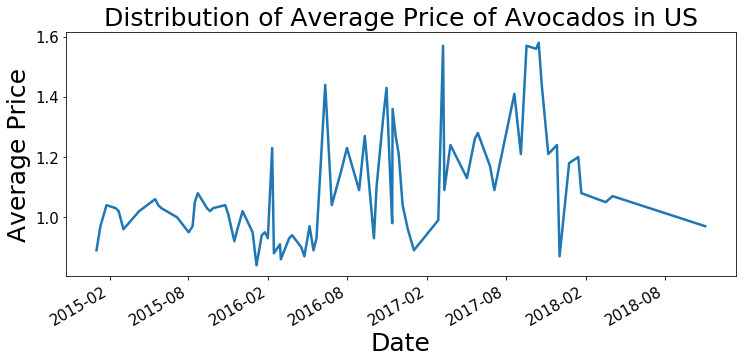

In [62]:
conventional['AveragePrice'].plot(lw=2.5, figsize=(12,5))
plt.ylabel('Average Price')
plt.title('Distribution of Average Price of Avocados in US')

In [102]:
# evaluate an ARIMA model for a given order (p,d,q)
#def evaluate_arima_model(X, arima_order):
    # split the data in to training dataset and test
 #   train_size = int(len(X) * 0.80)
  #  train, test = X[0:train_size], X[train_size:]
   # history = [x for x in train]
    # do predictions
    #predictions = list()
    #for i in range(len(test)):
     #   model = ARIMA(history, order=arima_order)
      #  model_fit = model.fit(disp=0)
       # yhat = model_fit.forecast()[0]
        #predictions.append(yhat)
        #history.append(test[i])
    # calculate out of sample error
    #error = mean_squared_error(test, predictions)
    #return error
 
# calculate combinations of p, d and q values for an ARIMA model
#def evaluate_models(dataset, p_values, d_values, q_values):
 #   dataset = dataset.astype('float32')
  #  best_score, best_cfg = float("inf"), None
   # for p in p_values:
    #    for d in d_values:
     #       for q in q_values:
      #          order = (p,d,q)
       #         try:
        #            mse = evaluate_arima_model(dataset, order)
         #           if mse < best_score:
          #              best_score, best_cfg = mse, order
           #         print('ARIMA%s MSE=%.3f' % (order,mse))
            #    except:
             #       continue
    #print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# calculate parameters
#p_values = range(0, 4)
#d_values = range(0, 4)
#q_values = range(0, 4)
#warnings.filterwarnings("ignore")
#evaluate_models(conventional.values, p_values, d_values, q_values)


C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

ARIMA(0, 0, 0) MSE=0.068
ARIMA(0, 0, 1) MSE=0.050
ARIMA(0, 0, 2) MSE=0.042
ARIMA(0, 0, 3) MSE=0.040
ARIMA(0, 1, 0) MSE=0.037
ARIMA(0, 1, 1) MSE=0.041


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(0, 1, 2) MSE=0.045
ARIMA(0, 2, 0) MSE=0.105
ARIMA(0, 2, 1) MSE=0.038
ARIMA(1, 0, 0) MSE=0.039


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ARIMA(1, 1, 0) MSE=0.031
ARIMA(1, 1, 1) MSE=0.041


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', 

ARIMA(1, 2, 0) MSE=0.053


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0) MSE=0.035


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0) MSE=0.035
ARIMA(2, 1, 1) MSE=0.039
ARIMA(2, 2, 0) MSE=0.044
ARIMA(3, 0, 0) MSE=0.036
ARIMA(3, 0, 1) MSE=0.038


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0) MSE=0.039
ARIMA(3, 1, 1) MSE=0.040
ARIMA(3, 2, 0) MSE=0.045
Best ARIMA(1, 1, 0) MSE=0.031


In [111]:
# following the grid search the ARIMA model
model = ARIMA(conventional['AveragePrice'], order = (2, 0, 0))
results_ARIMA = model.fit()
predictions = round(results_ARIMA.predict(), 2)
preds = pd.DataFrame(list(zip(list(predictions.index),list(predictions))),columns=['Date',
'PredictedPrice']).set_index('Date')
 
# merge the original data set with the predicted data
predicted_df = pd.merge(conventional[1:], preds, left_index=True, right_index=True)
predicted_df.head()


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Shali\Documents\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a

,AveragePrice,PredictedPrice
Date,,
2015-01-11,0.97,0.98
2015-01-25,1.04,1.00
2015-02-15,1.03,1.04
2015-02-22,1.02,1.05
2015-03-05,0.96,1.05


In [112]:
print("\tMean Squared Error:", mean_squared_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(predicted_df['AveragePrice'],
predicted_df['PredictedPrice'])))

	Mean Squared Error: 0.023209999999999998
	Root Mean Squared Error: 0.15234828518890522


In [113]:
# forecast from the model out 60 steps to 2018-12-30, and create a Series out of the data
ARIMA_forecast = pd.Series(results_ARIMA.forecast(steps = 60)[0])
 
# create an index from the end of the data out to the length of the forecast on a weekly basis
idx = pd.date_range('2018-04-01', '2018-12-30', freq='W')
 
# create a DataFrame combining the index above and the forecast prices
ARIMA_forecast = pd.DataFrame(list(zip(list(idx),list(ARIMA_forecast))),columns=['Date','ForecastPrice']).set_index('Date')
ARIMA_forecast =ARIMA_forecast .sort_index()
ARIMA_forecast


,ForecastPrice
Date,
2018-04-01,1.035451
2018-04-08,1.039324
2018-04-15,1.055329
2018-04-22,1.062538
2018-04-29,1.068937
2018-05-06,1.073070
2018-05-13,1.076125
2018-05-20,1.078251
2018-05-27,1.079771


C:\Users\Shali\Documents\Anaconda\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Text(0.5,1,'Average & Forecasted Price of Conventional Avocados in the United States')

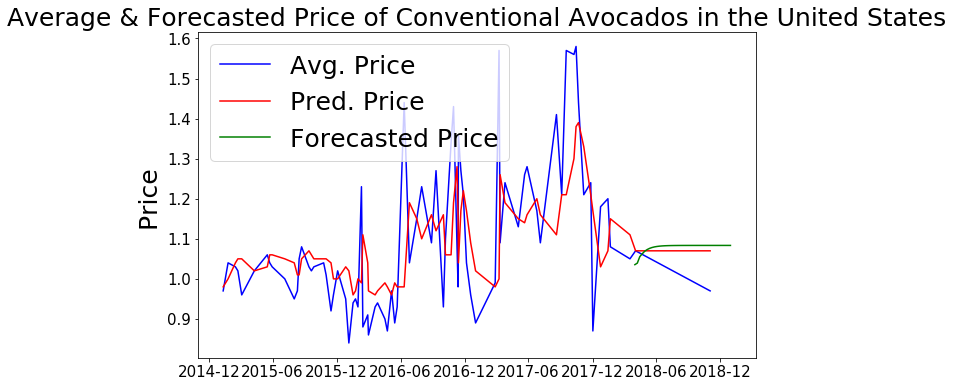

In [114]:
fig=plt.figure(figsize=(10,6))
fig.show()
ax=fig.add_subplot(111)

ax.plot(predicted_df['AveragePrice'],c='b',label='Avg. Price')
ax.plot(predicted_df['PredictedPrice'],c='r', label='Pred. Price')
ax.plot(ARIMA_forecast['ForecastPrice'],c='g', label='Forecasted Price')



plt.legend(loc='best')
plt.ylabel('Price ')
plt.title('Average & Forecasted Price of Conventional Avocados in the United States')

In [119]:
# following the model using the ARIMA order we had earlier
mod = sm.tsa.statespace.SARIMAX(conventional['AveragePrice'], order=(2, 0, 0), seasonal_order=(1, 0, 0, 24), enforce_stationarity=False, enforce_invertibility=False)

SARIMAX_results = mod.fit()
SARIMAX_predictions = round(SARIMAX_results.predict(), 2)
SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),list(SARIMAX_predictions))), columns=['Date','PredictedPrice']).set_index('Date')
 
# merge the original DataFrame with the predictions
SARIMAX_predicted_df = pd.merge(conventional[1:], SARIMAX_preds, left_index=True, right_index=True)

print("\tMean Squared Error:", mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice'])))


C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


	Mean Squared Error: 0.13180375000000003
	Root Mean Squared Error: 0.3630478618584608


In [120]:
print("\tMean Squared Error:", mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice'])))


	Mean Squared Error: 0.13180375000000003
	Root Mean Squared Error: 0.3630478618584608


In [121]:
SARIMAX_forecast = pd.DataFrame(round(SARIMAX_results.forecast(steps = 40), 1), columns = ['ForecastedPrice'])
SARIMAX_forecast = SARIMAX_forecast.reset_index(drop=True)

idx = pd.date_range('2018-04-01', '2018-12-30', freq='W')
idx1 = pd.DataFrame(idx, columns = ['Date'])
SARIMAX_forecast_new = pd.concat([idx1,SARIMAX_forecast ], axis=1)
SARIMAX_forecast_new.set_index('Date', inplace=True)
SARIMAX_forecast_new

C:\Users\Shali\Documents\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,ForecastedPrice
Date,
2018-04-01,1.1
2018-04-08,1.7
2018-04-15,1.2
2018-04-22,1.3
2018-04-29,1.2
2018-05-06,1.3
2018-05-13,1.4
2018-05-20,1.2
2018-05-27,1.2


C:\Users\Shali\Documents\Anaconda\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Text(0.5,1,'Average & Forecasted Price of Conventional Avocados in the United States')

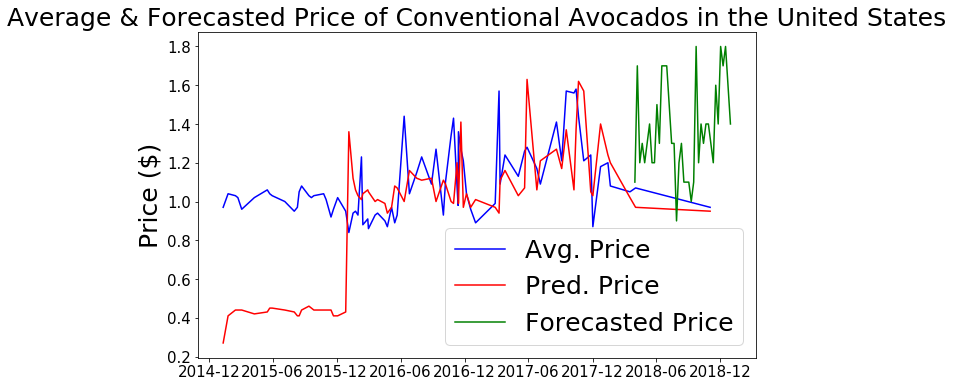

In [122]:
fig=plt.figure(figsize=(10,6))
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_df['AveragePrice'],c='b',label='Avg. Price')
ax.plot(SARIMAX_predicted_df['PredictedPrice'],c='r', label='Pred. Price')
ax.plot(SARIMAX_forecast_new['ForecastedPrice'],c='g', label='Forecasted Price')



plt.legend(loc='best')
plt.ylabel('Price ($)')
plt.title('Average & Forecasted Price of Conventional Avocados in the United States')

As we see that the model predicts a slight high in 2015 because of the seasonal trends we can see in 2016 and 2017. However, we can now see a more favorable forecast of rising and falling prices that we took a glance in 2016 and 2017. However, my personal inference of the "smaller" increment in prices is because of the relative flatness of prices in 2015. If 2015 had the same pattern as 2016 and 2017, the forecast for 2018 would have shown a larger price increase for October and November also.

###  SECTION 2

### Load the Datasets

In [72]:
#first load the Avocado dataset
data = pd.read_csv('avocado.csv',index_col=0)
data.rename(columns = {'Total Volume': 'TotVol'}, inplace=True)
data.head()
# Load the population data of US
col_Names=["region", "2010","2011","2012","2013","2014","2015","2016", "2017"]
pop = pd.read_excel('population.xlsx', names=col_Names, skiprows = 0)
# Convert in to the dataframe
data1 = pd.DataFrame(data)
pop1 = pd.DataFrame(pop)
pop1.head()

,region,2010,2011,2012,2013,2014,2015,2016,2017
0,TotalUS,309338421.0,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0
1,Northeast,55388349.0,55642659.0,55860261.0,56047732.0,56203078.0,56296628.0,56359360.0,56470581.0
2,Midwest,66973360.0,67141501.0,67318295.0,67534451.0,67720120.0,67839187.0,67978168.0,68179351.0
3,South,114869241.0,116060993.0,117291728.0,118422269.0,119699966.0,121081238.0,122423457.0,123658624.0
4,West,72107471.0,72799127.0,73522988.0,74230053.0,74999361.0,75822786.0,76644950.0,77410622.0


In [73]:
# check columns headers
pop1.columns

Index(['region', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

In [74]:
# Put the different years population in to new column
pop_2010 = pop1[['region','2010']]
pop_2010 = pop_2010.rename(columns={'2010': 'population'})
pop_2010['year'] = '2010'

pop_2011 = pop1[['region','2011']]
pop_2011 = pop_2011.rename(columns={'2011': 'population'})
pop_2011['year'] = '2011'

pop_2012 = pop1[['region','2012']]
pop_2012 = pop_2012.rename(columns={'2012': 'population'})
pop_2012['year'] = '2012'

pop_2013 = pop1[['region','2013']]
pop_2013 = pop_2013.rename(columns={'2013': 'population'})
pop_2013['year'] = '2013'

pop_2014 = pop1[['region','2014']]
pop_2014 = pop_2014.rename(columns={'2014': 'population'})
pop_2014['year'] = '2014'

pop_2015 = pop1[['region','2015']]
pop_2015 = pop_2015.rename(columns={'2015': 'population'})
pop_2015['year'] = '2015'

pop_2016 = pop1[['region','2016']]
pop_2016 = pop_2016.rename(columns={'2016': 'population'})
pop_2016['year'] = '2016'
pop_2016

,region,population,year
0,TotalUS,323405935.0,2016
1,Northeast,56359360.0,2016
2,Midwest,67978168.0,2016
3,South,122423457.0,2016
4,West,76644950.0,2016
5,Alabama,4860545.0,2016
6,Alaska,741522.0,2016
7,Arizona,6908642.0,2016
8,Arkansas,2988231.0,2016
9,California,39296476.0,2016


we chose only year 2015 and 2016  data out of both datasets because these are common in both.

In [75]:
# concatenate the two dataframes
frames = [pop_2015, pop_2016]
result = pd.concat(frames)
result.reset_index(drop=True)
result.isna().sum()
resultNA = result.dropna()
resultNA.isna().sum()

region        0
population    0
year          0
dtype: int64

In [76]:
resultNA.head()

,region,population,year
0,TotalUS,321039839.0,2015
1,Northeast,56296628.0,2015
2,Midwest,67839187.0,2015
3,South,121081238.0,2015
4,West,75822786.0,2015


In [77]:
# choose common regions between both dataset 
result5 = resultNA[(resultNA.region == 'TotalUS')|(resultNA.region == 'California')|(resultNA.region == 'West')|(resultNA.region == 'NewYork')
                     |(resultNA.region == 'Northeast')|(resultNA.region == 'southCarolina')|(resultNA.region == 'Houston')
                     |(resultNA.region == 'LasVegas')|(resultNA.region == 'Denver')|(resultNA.region == 'TotalUS')]

result5


,region,population,year
0,TotalUS,321039839.0,2015
1,Northeast,56296628.0,2015
4,West,75822786.0,2015
9,California,39032444.0,2015
10,Denver,5440445.0,2015
33,LasVegas,2883057.0,2015
37,NewYork,19819347.0,2015
48,Houston,27454880.0,2015
0,TotalUS,323405935.0,2016
1,Northeast,56359360.0,2016


In [78]:
# first few values of avocado dataset
data1.head()

,Date,AveragePrice,TotVol,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [79]:
# pull out year 2015 and 2016 data out of original avocado data
data2 = data1[(data1.year == 2015)]
data3 = data1[(data1.year == 2016)]
data2.head()

,Date,AveragePrice,TotVol,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [80]:
data2_California_2015 = data2[data2.region == 'California']
data2_West_2015 = data2[data2.region == 'West']
data2_NewYork_2015 = data2[data2.region == 'NewYork']
data2_Northeast_2015 = data2[data2.region == 'Northeast']
data2_Houston_2015 = data2[data2.region == 'Houston']
data2_LasVegas_2015 = data2[data2.region == 'LasVegas']
data2_Denver_2015 = data2[data2.region == 'Denver']
data2_TotalUS_2015 = data2[data2.region == 'TotalUS']

data3_California_2016 = data3[data3.region == 'California']
data3_West_2016 = data3[data3.region == 'West']
data3_NewYork_2016 = data3[data3.region == 'NewYork']
data3_Northeast_2016 = data3[data3.region == 'Northeast']
data3_Houston_2016 = data2[data2.region == 'Houston']
data3_LasVegas_2016 = data2[data2.region == 'LasVegas']
data3_Denver_2016 = data2[data2.region == 'Denver']
data3_TotalUS_2016 = data2[data2.region == 'TotalUS']


regional_annual_year_2015 = [2015,2015,2015,2015,2015,2015,2015,2015]
regional_annual_year_2016 = [2016,2016,2016,2016,2016,2016,2016,2016]

regional_annual_region_2015 = ['California','West','NewYork','Northeast', 'Houston', 'LasVegas', 'Denver', 'TotalUS']
regional_annual_region_2016 = ['California','West','NewYork','Northeast', 'Houston', 'LasVegas', 'Denver', 'TotalUS']

regional_annual_avg_price_2015 = [data2_California_2015.AveragePrice.mean(),data2_West_2015.AveragePrice.mean(), data2_NewYork_2015.AveragePrice.mean(), data2_Northeast_2015.AveragePrice.mean(),data2_Houston_2015.AveragePrice.mean(), data2_LasVegas_2015.AveragePrice.mean(), data2_Denver_2015.AveragePrice.mean(), data2_TotalUS_2015.AveragePrice.mean()]
regional_annual_avg_price_2016 = [data3_California_2016.AveragePrice.mean(),data3_West_2016.AveragePrice.mean(), data3_NewYork_2016.AveragePrice.mean(), data3_Northeast_2016.AveragePrice.mean(),data3_Houston_2016.AveragePrice.mean(), data3_LasVegas_2016.AveragePrice.mean(), data3_Denver_2016.AveragePrice.mean(), data3_TotalUS_2016.AveragePrice.mean()]


regional_annual_totalvol_2015 = [data2_California_2015.TotVol.sum(),data2_West_2015.TotVol.sum(), data2_NewYork_2015.TotVol.sum(), data2_Northeast_2015.TotVol.sum(),data2_Houston_2015.TotVol.sum(), data2_LasVegas_2015.TotVol.sum(), data2_Denver_2015.TotVol.sum(), data2_TotalUS_2015.TotVol.sum()]
regional_annual_totalvol_2016 = [data3_California_2016.TotVol.sum(),data3_West_2016.TotVol.sum(), data3_NewYork_2016.TotVol.sum(), data3_Northeast_2016.TotVol.sum(),data3_Houston_2016.TotVol.sum(), data3_LasVegas_2016.TotVol.sum(), data3_Denver_2016.TotVol.sum(), data3_TotalUS_2016.TotVol.sum()]


In [81]:
# concat the dataframes
frames_data = [data2, data3]
result_data = pd.concat(frames_data)
result_data.head()

,Date,AveragePrice,TotVol,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [82]:
# choose the regions which are common in both datasets
result4 = result_data[(result_data.region == 'TotalUS')|(result_data.region == 'California')|(result_data.region == 'West')|(result_data.region == 'NewYork')
                     |(result_data.region == 'Northeast')|(result_data.region == 'southCarolina')|(result_data.region == 'Houston')
                     |(result_data.region == 'LasVegas')|(result_data.region == 'Denver')|(result_data.region == 'TotalUS')]
result4


,Date,AveragePrice,TotVol,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
1,20/12/2015,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
2,13/12/2015,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
3,06/12/2015,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
4,29/11/2015,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
5,22/11/2015,0.92,4804278.16,1602215.57,1917124.52,215632.16,1069305.91,979612.52,82444.32,7249.07,conventional,2015,California
6,15/11/2015,0.83,5755190.69,2243013.44,2164098.99,195159.32,1152918.94,1091768.68,53797.92,7352.34,conventional,2015,California
7,08/11/2015,0.98,5148983.51,2317858.81,1758964.54,216523.58,855636.58,813006.40,36305.96,6324.22,conventional,2015,California
8,01/11/2015,0.95,5830427.96,2369824.75,2596785.28,211901.97,651915.96,626993.54,19804.69,5117.73,conventional,2015,California
9,25/10/2015,1.12,4592461.81,1733791.31,2025016.15,215622.63,618031.72,606392.86,7596.27,4042.59,conventional,2015,California


In [83]:
# create new dataframes for both year 2015 and 2016
regional_annual2015_list = pd.DataFrame(
    {'year': regional_annual_year_2015,
     'region': regional_annual_region_2015,
     'avgprice': regional_annual_avg_price_2015,
     'TotVol': regional_annual_totalvol_2015
    })

regional_annual2016_list = pd.DataFrame(
    {'year': regional_annual_year_2016,
     'region': regional_annual_region_2016,
     'avgprice': regional_annual_avg_price_2016,
     'TotVol': regional_annual_totalvol_2016
    })

In [84]:
# concatenate borh dataframes
frames_data1 = [regional_annual2015_list, regional_annual2016_list]
avocado_reg = pd.concat(frames_data1)
avocado_reg.set_index('region', inplace=True)
avocado_reg.sort_index(inplace=True)
avocado_reg

,year,avgprice,TotVol
region,,,
California,2015,1.315865,3.014074e+08
California,2016,1.329904,3.261884e+08
Denver,2015,1.187788,3.919034e+07
Denver,2016,1.187788,3.919034e+07
Houston,2015,1.048077,5.538747e+07
Houston,2016,1.048077,5.538747e+07
LasVegas,2015,1.368846,1.554243e+07
LasVegas,2016,1.368846,1.554243e+07
NewYork,2015,1.644519,7.060764e+07


In [85]:
popl = result5
popl.sort_index(inplace=True)
popl_2015 = popl[popl.year == '2015']
popl_2016 = popl[popl.year == '2016']

C:\Users\Shali\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
# merage the dataframe of pop1_2015 and regional_annual2015_list
merge_2015 = pd.merge(regional_annual2015_list, popl_2015, on = 'region', how = 'outer')
merge_2015

,year_x,region,avgprice,TotVol,population,year_y
0,2015,California,1.315865,3.014074e+08,39032444.0,2015
1,2015,West,1.237788,3.046703e+08,75822786.0,2015
2,2015,NewYork,1.644519,7.060764e+07,19819347.0,2015
3,2015,Northeast,1.543750,2.033790e+08,56296628.0,2015
4,2015,Houston,1.048077,5.538747e+07,27454880.0,2015
5,2015,LasVegas,1.368846,1.554243e+07,2883057.0,2015
6,2015,Denver,1.187788,3.919034e+07,5440445.0,2015
7,2015,TotalUS,1.257404,1.657255e+09,321039839.0,2015


In [87]:

# merge the dataframes of pop_2016 and regional_annual2016_list
merge_2016 = pd.merge(regional_annual2016_list, popl_2016, on = 'region', how = 'outer')
merge_2016

,year_x,region,avgprice,TotVol,population,year_y
0,2016,California,1.329904,3.261884e+08,39296476.0,2016
1,2016,West,1.180865,3.445773e+08,76644950.0,2016
2,2016,NewYork,1.762019,7.154656e+07,19836286.0,2016
3,2016,Northeast,1.595673,2.189311e+08,56359360.0,2016
4,2016,Houston,1.048077,5.538747e+07,27904862.0,2016
5,2016,LasVegas,1.368846,1.554243e+07,2939254.0,2016
6,2016,Denver,1.187788,3.919034e+07,5530105.0,2016
7,2016,TotalUS,1.257404,1.657255e+09,323405935.0,2016


In [88]:
# merge the finaldata for inference
frames_Merge = [merge_2015, merge_2016]
Final_Merge = pd.concat(frames_Merge)

pop_totvol = (Final_Merge.TotVol/Final_Merge.population)
# add new column population per capita
Final_Merge['pop_capita'] = pop_totvol
Final_Merge2 = Final_Merge.drop(columns = ['year_y'], axis=1)
Final_Merge2 = Final_Merge2.reset_index(drop = True)
Final_Merge2

,year_x,region,avgprice,TotVol,population,pop_capita
0,2015,California,1.315865,3.014074e+08,39032444.0,7.721972
1,2015,West,1.237788,3.046703e+08,75822786.0,4.018189
2,2015,NewYork,1.644519,7.060764e+07,19819347.0,3.562561
3,2015,Northeast,1.543750,2.033790e+08,56296628.0,3.612632
4,2015,Houston,1.048077,5.538747e+07,27454880.0,2.017400
5,2015,LasVegas,1.368846,1.554243e+07,2883057.0,5.390954
6,2015,Denver,1.187788,3.919034e+07,5440445.0,7.203518
7,2015,TotalUS,1.257404,1.657255e+09,321039839.0,5.162148
8,2016,California,1.329904,3.261884e+08,39296476.0,8.300703
9,2016,West,1.180865,3.445773e+08,76644950.0,4.495760


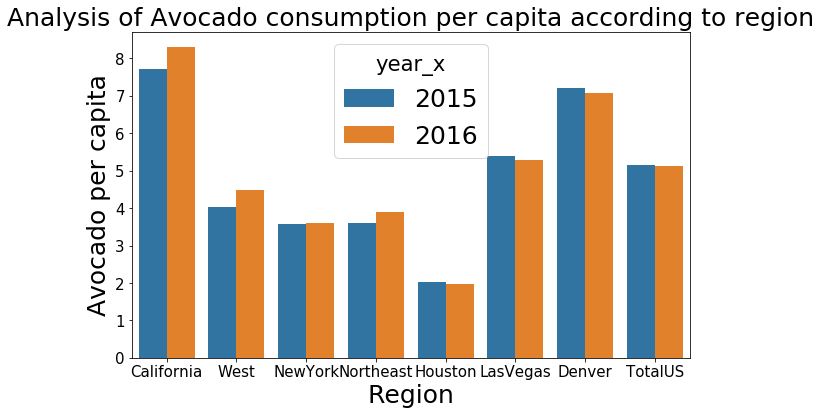

In [89]:
plt.figure(figsize=(10,6))
plt.title('Average price of conventional and organic avocados')
sns.barplot(x="region", y="pop_capita", hue='year_x', data=Final_Merge2)
plt.xlabel('Region')
plt.ylabel('Avocado per capita')
plt.title('Analysis of Avocado consumption per capita according to region')
plt.show()

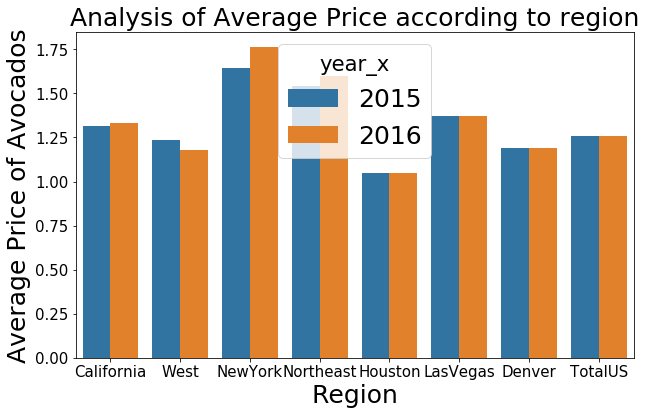

In [90]:
plt.figure(figsize=(10,6))
plt.title('Average price of conventional and organic avocados')
sns.barplot(x="region", y="avgprice", hue='year_x', data=Final_Merge2)
plt.xlabel('Region')
plt.ylabel('Average Price of Avocados')
plt.title('Analysis of Average Price according to region')
plt.show()

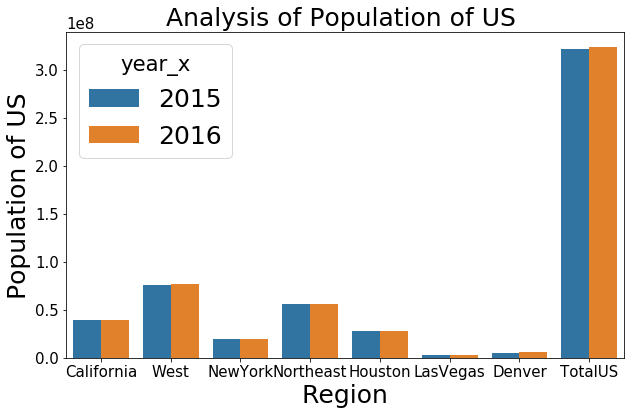

In [91]:
plt.figure(figsize=(10,6))
plt.title('Average price of conventional and organic avocados')
sns.barplot(x="region", y="population", hue='year_x', data=Final_Merge2)
plt.xlabel('Region')
plt.ylabel('Population of US')
plt.title('Analysis of Population of US ')
plt.show()

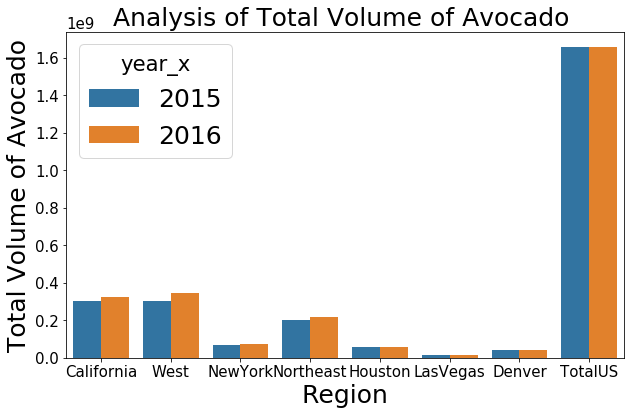

In [92]:
plt.figure(figsize=(10,6))
plt.title('Average price of conventional and organic avocados')
sns.barplot(x="region", y="TotVol", hue='year_x', data=Final_Merge2)
plt.xlabel('Region')
plt.ylabel('Total Volume of Avocado')
plt.title('Analysis of Total Volume of Avocado ')
plt.show()

In [93]:
# Load the data
Per_Capita_all_Fruits = pd.read_csv('Per_Capita_all_Fruits_v2.csv')
Per_Capita_all_Fruits_NA= Per_Capita_all_Fruits.drop(Per_Capita_all_Fruits.columns[Per_Capita_all_Fruits.columns.str.contains('unnamed',case = False)],axis = 1)
#Per_Capita_all_Fruits_DFNA
Per_Capita_all_Fruits_v2= Per_Capita_all_Fruits_NA.dropna()
PerCApita_DF = pd.DataFrame(Per_Capita_all_Fruits_v2)
PerCApita_DF.head()

,Crop_Pounds,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Applesall,50.7,49.8,47.9,47.3,47.6,42.5,43.4,45.5,45.5,46.3,48.4,47.0
1,AppleFresh,17.7,16.4,15.9,16.2,15.3,15.4,16.0,17.3,18.6,17.3,18.9,17.7
2,Canning,4.2,4.0,4.6,4.2,4.0,4.2,3.2,4.7,4.2,4.3,4.6,4.4
3,Freezing,0.8,0.9,0.7,0.8,0.6,0.7,0.3,0.8,0.8,0.7,0.4,0.4
4,Juice,26.4,27.1,25.0,24.9,26.4,20.6,22.5,21.3,20.4,22.5,22.4,22.1


In [94]:
# Transpose the dataframe
PerCApita_DF_T = PerCApita_DF.T
PerCApita_DF_T

,0,1,2,3,4,5,6,8,9,10,...,71,73,74,75,76,77,79,80,81,82
Crop_Pounds,Applesall,AppleFresh,Canning,Freezing,Juice,Dried,Otherprocessed,Grapesall,GrapesFresh,Canning,...,Dried,Treenutsall12,Almonds,Pecans,Walnuts,Others13,Totalallitems,AllCitrus,AllNoncitrus&nuts,AllMelons
2006,50.7,17.7,4.2,0.8,26.4,1,0.6,49.4,7.6,0.1,...,10.5,3.3,1,0.4,0.5,1.3,302.1,93.3,181.9,26.9
2007,49.8,16.4,4,0.9,27.1,0.9,0.5,51.8,8,0.1,...,9.8,3.6,1.2,0.4,0.5,1.5,296.1,85.4,184.2,26.4
2008,47.9,15.9,4.6,0.7,25,0.9,0.8,50.2,8.3,0.2,...,9.8,3.6,1.4,0.5,0.5,1.2,290.6,82.7,181.3,26.7
2009,47.3,16.2,4.2,0.8,24.9,0.6,0.6,52.7,7.7,0.1,...,8.9,3.7,1.4,0.5,0.6,1.3,292.5,85.1,181.3,26.1
2010,47.6,15.3,4,0.6,26.4,0.7,0.7,51.8,7.9,0.2,...,9.3,3.8,1.6,0.5,0.4,1.3,293.2,82.4,184.3,26.5
2011,42.5,15.4,4.2,0.7,20.6,0.6,1,51.8,7.3,0.2,...,9.7,3.8,1.8,0.4,0.4,1.2,291.5,86.7,180.1,24.7
2012,43.4,16,3.2,0.3,22.5,0.9,0.6,55.5,7.6,0.1,...,9.2,4.2,2,0.4,0.5,1.3,286.8,76.2,187.2,23.4
2013,45.5,17.3,4.7,0.8,21.3,0.6,0.8,58.5,7.7,0.1,...,9.9,4,1.9,0.4,0.5,1.3,297.6,79.1,193.5,25
2014,45.5,18.6,4.2,0.8,20.4,0.7,0.8,54.5,7.7,0.1,...,9.5,4.1,1.7,0.5,0.4,1.5,289.3,75.9,190.6,22.8


In [95]:
PerCApita_DF2 = PerCApita_DF.set_index("Crop_Pounds", drop = True)
PerCApita_DF2_T = PerCApita_DF2.T
PerCApita_DF2_T.rename(columns = {'Crop_Pounds': 'Year'}, inplace = True)

PerCApita_DF2_T ['Year'] = PerCApita_DF2_T.index
Wine = PerCApita_DF2_T.Wine
PerCApita_DF2_T

Crop_Pounds,Applesall,AppleFresh,Canning,Freezing,Juice,Dried,Otherprocessed,Grapesall,GrapesFresh,Canning,...,Treenutsall12,Almonds,Pecans,Walnuts,Others13,Totalallitems,AllCitrus,AllNoncitrus&nuts,AllMelons,Year
2006,50.7,17.7,4.2,0.8,26.4,1.0,0.6,49.4,7.6,0.1,...,3.3,1.0,0.4,0.5,1.3,302.1,93.3,181.9,26.9,2006
2007,49.8,16.4,4.0,0.9,27.1,0.9,0.5,51.8,8.0,0.1,...,3.6,1.2,0.4,0.5,1.5,296.1,85.4,184.2,26.4,2007
2008,47.9,15.9,4.6,0.7,25.0,0.9,0.8,50.2,8.3,0.2,...,3.6,1.4,0.5,0.5,1.2,290.6,82.7,181.3,26.7,2008
2009,47.3,16.2,4.2,0.8,24.9,0.6,0.6,52.7,7.7,0.1,...,3.7,1.4,0.5,0.6,1.3,292.5,85.1,181.3,26.1,2009
2010,47.6,15.3,4.0,0.6,26.4,0.7,0.7,51.8,7.9,0.2,...,3.8,1.6,0.5,0.4,1.3,293.2,82.4,184.3,26.5,2010
2011,42.5,15.4,4.2,0.7,20.6,0.6,1.0,51.8,7.3,0.2,...,3.8,1.8,0.4,0.4,1.2,291.5,86.7,180.1,24.7,2011
2012,43.4,16.0,3.2,0.3,22.5,0.9,0.6,55.5,7.6,0.1,...,4.2,2.0,0.4,0.5,1.3,286.8,76.2,187.2,23.4,2012
2013,45.5,17.3,4.7,0.8,21.3,0.6,0.8,58.5,7.7,0.1,...,4.0,1.9,0.4,0.5,1.3,297.6,79.1,193.5,25.0,2013
2014,45.5,18.6,4.2,0.8,20.4,0.7,0.8,54.5,7.7,0.1,...,4.1,1.7,0.5,0.4,1.5,289.3,75.9,190.6,22.8,2014
2015,46.3,17.3,4.3,0.7,22.5,0.7,0.8,52.5,7.9,0.1,...,4.1,1.8,0.4,0.4,1.4,290.0,75.5,190.6,24.0,2015


In [96]:
AppleFresh_20p = (PerCApita_DF2_T.AppleFresh/5)
Bananasfresh_20p = (PerCApita_DF2_T.Bananasfresh/5)

PerCApita_DF2_T['Bananasfresh_20per'] = Bananasfresh_20p
PerCApita_DF2_T['AppleFresh_20per'] = AppleFresh_20p
PerCApita_DF2_T

Crop_Pounds,Applesall,AppleFresh,Canning,Freezing,Juice,Dried,Otherprocessed,Grapesall,GrapesFresh,Canning,...,Pecans,Walnuts,Others13,Totalallitems,AllCitrus,AllNoncitrus&nuts,AllMelons,Year,Bananasfresh_20per,AppleFresh_20per
2006,50.7,17.7,4.2,0.8,26.4,1.0,0.6,49.4,7.6,0.1,...,0.4,0.5,1.3,302.1,93.3,181.9,26.9,2006,5.02,3.54
2007,49.8,16.4,4.0,0.9,27.1,0.9,0.5,51.8,8.0,0.1,...,0.4,0.5,1.5,296.1,85.4,184.2,26.4,2007,5.20,3.28
2008,47.9,15.9,4.6,0.7,25.0,0.9,0.8,50.2,8.3,0.2,...,0.5,0.5,1.2,290.6,82.7,181.3,26.7,2008,5.00,3.18
2009,47.3,16.2,4.2,0.8,24.9,0.6,0.6,52.7,7.7,0.1,...,0.5,0.6,1.3,292.5,85.1,181.3,26.1,2009,4.40,3.24
2010,47.6,15.3,4.0,0.6,26.4,0.7,0.7,51.8,7.9,0.2,...,0.5,0.4,1.3,293.2,82.4,184.3,26.5,2010,5.12,3.06
2011,42.5,15.4,4.2,0.7,20.6,0.6,1.0,51.8,7.3,0.2,...,0.4,0.4,1.2,291.5,86.7,180.1,24.7,2011,5.10,3.08
2012,43.4,16.0,3.2,0.3,22.5,0.9,0.6,55.5,7.6,0.1,...,0.4,0.5,1.3,286.8,76.2,187.2,23.4,2012,5.38,3.20
2013,45.5,17.3,4.7,0.8,21.3,0.6,0.8,58.5,7.7,0.1,...,0.4,0.5,1.3,297.6,79.1,193.5,25.0,2013,5.60,3.46
2014,45.5,18.6,4.2,0.8,20.4,0.7,0.8,54.5,7.7,0.1,...,0.5,0.4,1.5,289.3,75.9,190.6,22.8,2014,5.56,3.72
2015,46.3,17.3,4.3,0.7,22.5,0.7,0.8,52.5,7.9,0.1,...,0.4,0.4,1.4,290.0,75.5,190.6,24.0,2015,5.58,3.46


<Figure size 432x288 with 0 Axes>

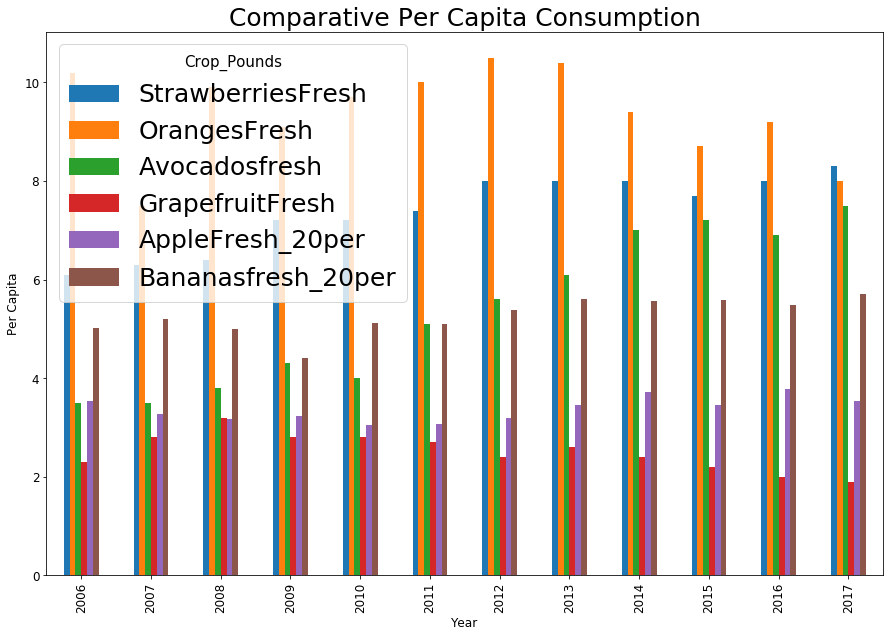

<Figure size 432x288 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt

ax = PerCApita_DF2_T[['StrawberriesFresh','OrangesFresh', 'Avocadosfresh', 'GrapefruitFresh', 'AppleFresh_20per', 'Bananasfresh_20per']].plot(kind='bar', title ="Comparative Per Capita Consumption", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Per Capita", fontsize=12)
plt.figure(figsize=(6,4))

we can see that avocado is increasing rapidly in comparision to other fruits